In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
xl_filename = "mix_2019.xlsx"

In [ ]:
df = pd.read_excel(xl_filename)
df = df.dropna(axis='index')

In [ ]:
dates = df['Date']
heures = df['Heures']
dates_heures = dates.apply(lambda x: x.strftime('%Y-%m-%d')) + ' ' + heures.apply(lambda x: x.strftime('%H:%M:%S'))
df['Time'] = pd.to_datetime(dates_heures)
df = df.set_index('Time')
df

,Périmètre,Nature,Date,Heures,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,Nucléaire,Eolien,Solaire,Hydraulique,Pompage,Bioénergies,Ech. physiques,Taux de Co2,Ech. comm. Angleterre,Ech. comm. Espagne,Ech. comm. Italie,Ech. comm. Suisse,Ech. comm. Allemagne-Belgique,Fioul - TAC,Fioul - Cogén.,Fioul - Autres,Gaz - TAC,Gaz - Cogén.,Gaz - CCG,Gaz - Autres,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,France,Données définitives,2019-01-01,00:00:00,64207.0,64200.0,63800.0,146.0,11.0,3430.0,55577.0,1517.0,-2.0,4593.0,-1692.0,1172.0,-545.0,25.0,-1555.0,-2400.0,456.0,-2288.0,3765.0,20.0,101.0,6.0,4.0,2482.0,832.0,112.0,3513.0,1080.0,1.0,555.0,322.0,295.0
2019-01-01 00:30:00,France,Données définitives,2019-01-01,00:30:00,63162.0,62700.0,62200.0,149.0,12.0,3029.0,56211.0,1719.0,-2.0,4963.0,-1506.0,1168.0,-2581.0,23.0,-1555.0,-2400.0,456.0,-2288.0,3765.0,20.0,106.0,6.0,4.0,2550.0,378.0,96.0,3454.0,1342.0,167.0,562.0,314.0,292.0
2019-01-01 01:00:00,France,Données définitives,2019-01-01,01:00:00,60923.0,60500.0,60200.0,149.0,12.0,2858.0,55039.0,1691.0,-2.0,4261.0,-1507.0,1160.0,-2740.0,22.0,-1555.0,-2400.0,709.0,-2353.0,3130.0,20.0,105.0,7.0,4.0,2566.0,191.0,98.0,3369.0,765.0,127.0,559.0,310.0,291.0
2019-01-01 01:30:00,France,Données définitives,2019-01-01,01:30:00,60729.0,61100.0,60900.0,147.0,10.0,2866.0,55269.0,1714.0,-2.0,4085.0,-1662.0,1161.0,-2860.0,22.0,-1555.0,-2400.0,709.0,-2353.0,3130.0,20.0,106.0,6.0,4.0,2567.0,200.0,95.0,3254.0,684.0,147.0,565.0,306.0,291.0
2019-01-01 02:00:00,France,Données définitives,2019-01-01,02:00:00,60127.0,60800.0,60400.0,146.0,13.0,2825.0,54950.0,1649.0,-2.0,3913.0,-1745.0,1167.0,-2789.0,22.0,-1506.0,-2400.0,52.0,-2336.0,3587.0,20.0,105.0,6.0,4.0,2564.0,162.0,94.0,3126.0,787.0,0.0,566.0,312.0,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 21:30:00,France,Données définitives,2019-12-31,21:30:00,63404.0,63600.0,64700.0,485.0,14.0,7060.0,49496.0,3108.0,-1.0,9687.0,-31.0,1185.0,-7599.0,44.0,-2000.0,-3353.0,-2726.0,-2638.0,2860.0,-2.0,72.0,397.0,4.0,2373.0,4589.0,95.0,6420.0,2700.0,567.0,517.0,341.0,327.0
2019-12-31 22:00:00,France,Données définitives,2019-12-31,22:00:00,62801.0,63400.0,64600.0,479.0,14.0,6893.0,49194.0,3203.0,-1.0,9052.0,-48.0,1186.0,-7171.0,44.0,-2000.0,-771.0,-2119.0,-2176.0,1534.0,-2.0,72.0,391.0,4.0,2378.0,4416.0,95.0,6356.0,2455.0,241.0,517.0,343.0,326.0
2019-12-31 22:30:00,France,Données définitives,2019-12-31,22:30:00,63629.0,64800.0,66100.0,471.0,15.0,6782.0,48954.0,3264.0,-1.0,8640.0,-62.0,1191.0,-5624.0,44.0,-2000.0,-771.0,-2119.0,-2176.0,2548.0,-2.0,72.0,382.0,4.0,2376.0,4307.0,95.0,6319.0,2258.0,64.0,524.0,342.0,326.0


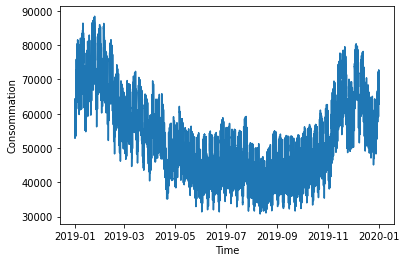

In [ ]:
conso_2019 = df['Consommation']
sns.lineplot(x='Time',y='Consommation',data=df)

In [ ]:
def retranche_consommation(df,conso_name,total_nouvelle_conso_MW,new_col_name):
  '''
  cut a part of conso such as the total energy equals total_nouvelle_conso
  Be aware of units => MW
  param 
        df: dataframe from RTE
        conso_name: 'Consommation'
        total_nouvelle_conso: floating value MW
        new_col_name: 'new name'
  return
        new dataframe column of conso MW
  '''
  actual_conso = df.sum()[conso_name]
  x=(actual_conso-total_nouvelle_conso_MW)/(8760*2)
  df[new_col_name] = df[conso_name]-x

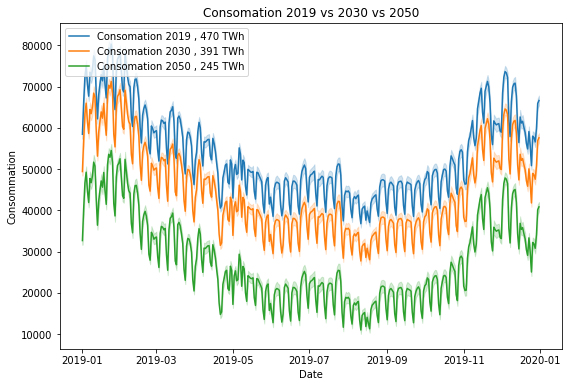

In [ ]:
conso_2012_TWh = 489
conso_2012_MW= conso_2012_TWh*2E6

retranche_consommation(df,'Consommation',conso_2012_MW*(0.5),'conso_LTECV_2050')
retranche_consommation(df,'Consommation',conso_2012_MW*(0.8),'conso_LTECV_2030')

fig = plt.figure(figsize = (9, 6))
sns.lineplot(x='Date',y='Consommation',data=df,label='Consomation 2019 , '+str(round(df.sum()['Consommation']/2E+6))+' TWh')
sns.lineplot(x='Date',y='conso_LTECV_2030',data=df,label='Consomation 2030 , '+str(round(df.sum()['conso_LTECV_2030']/2E+6))+' TWh')
sns.lineplot(x='Date',y='conso_LTECV_2050',data=df,label='Consomation 2050 , '+str(round(df.sum()['conso_LTECV_2050']/2E+6))+' TWh')

plt.title('Consomation 2019 vs 2030 vs 2050')
plt.legend(loc="upper left")
fig.savefig('Consomation.png')

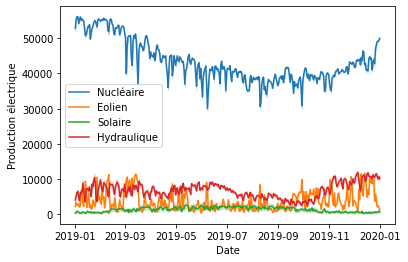

In [ ]:
for prod in ['Nucléaire','Eolien','Solaire','Hydraulique']:
  sns.lineplot(x='Date',y=prod,data=df,label=prod)
plt.ylabel('Production électrique')
plt.legend()

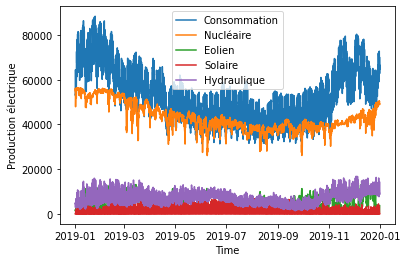

In [ ]:
for prod in ['Consommation','Nucléaire','Eolien','Solaire','Hydraulique']:
  sns.lineplot(x='Time',y=prod,data=df,label=prod)
plt.ylabel('Production électrique')
plt.legend()

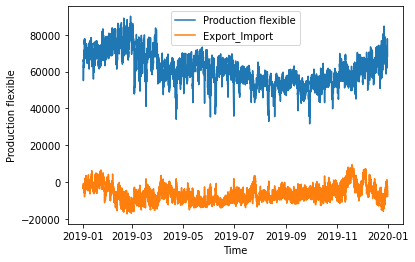

In [ ]:
df['Production flexible']=df['Nucléaire']+df['Hydraulique']+df['Fioul']+df['Charbon']+df['Gaz']
df['Production non flexible']=df['Eolien']+df['Solaire']
export_import = np.zeros(df.shape[0])
for pays in ['Angleterre','Espagne','Italie','Suisse','Allemagne-Belgique']:
  export_import+=df['Ech. comm. '+pays]
df['Export_Import']=export_import
df['Production flexible']=df['Production flexible']-df['Export_Import']
for prod in ['Production flexible','Export_Import']:
  sns.lineplot(x='Time',y=prod,data=df,label=prod)

In [ ]:
df['Consommation non flexible'] = df['Consommation']-df['Production non flexible']		

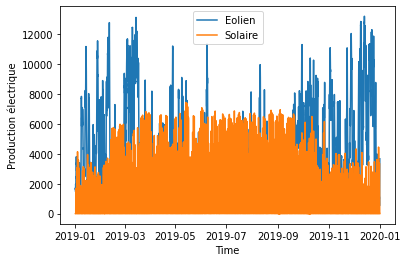

In [ ]:
for prod in ['Eolien','Solaire']:
  sns.lineplot(x='Time',y=prod,data=df,label=prod)
plt.ylabel('Production électrique')
plt.legend()

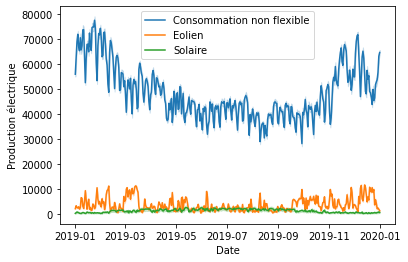

In [ ]:
for prod in ['Consommation non flexible','Eolien','Solaire']:
  sns.lineplot(x='Date',y=prod,data=df,label=prod)
plt.ylabel('Production électrique')
plt.legend()

In [ ]:
v=df['Consommation non flexible'].to_numpy()
df['Consommation non flexible normalisé'] = v/np.linalg.norm(v)

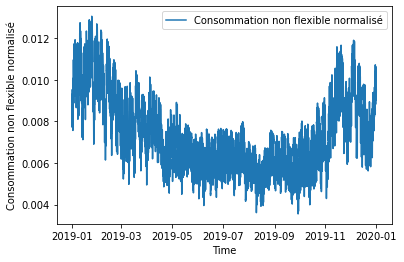

In [ ]:
sns.lineplot(x='Time',y='Consommation non flexible normalisé',data=df,label='Consommation non flexible normalisé')